In [4]:
# Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

# Потроить график Precision - Recall на этих же данных.

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [13]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
# data.info()

In [38]:
selectedColumns = data[ [ 'age', 'educational-num', 'relationship', 'hours-per-week' ] ] # 'race', 'gender'
# selectedColumns.head()
X = pd.get_dummies( selectedColumns, columns = [ 'relationship' ] )#, 'race', 'gender']  )
X.head()

,age,educational-num,hours-per-week,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,40,0,0,0,1,0,0
1,38,9,50,1,0,0,0,0,0
2,28,12,40,1,0,0,0,0,0
3,44,10,40,1,0,0,0,0,0
4,18,10,30,0,0,0,1,0,0


In [39]:
y = data['income']

In [40]:
le.fit( data['income'] )
y = pd.Series( data = le.transform( data['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)
model.fit(X_train, y_train)

C:\Users\S.Nikulin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [76]:
predictions = model.predict_proba(X_test)
predictions[:3]

array([[0.99582589, 0.00417411],
       [0.74304557, 0.25695443],
       [0.97280733, 0.02719267]])

In [77]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [84]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )[1]

(0.2489703167163755, 1.0, 0.004335682706539027)


TypeError: 'NoneType' object is not subscriptable

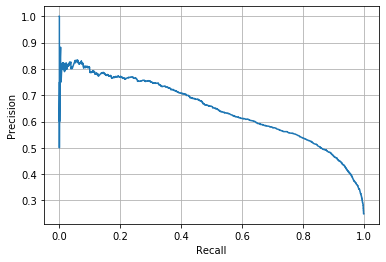

In [97]:
plt.ylabel('Precision')
plt.xlabel('Recall')

plt.plot(re, pr)
plt.grid()

In [98]:
from sklearn.metrics import average_precision_score

In [99]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.6460101958846592

In [113]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [114]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [116]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9691808717735004)
(0.0, 0.0002852253280091272, 0.9691808717735004)
(8.971023593792052e-05, 0.0002852253280091272, 0.9689396757965073)
(8.971023593792052e-05, 0.0008556759840273817, 0.9614509610717098)
(0.00017942047187584104, 0.0008556759840273817, 0.9591783842412802)
(0.00017942047187584104, 0.0019965772960638907, 0.9510909450258571)
(0.00017942047187584104, 0.002567027952082145, 0.9489019853415915)
(0.00017942047187584104, 0.004278379920136908, 0.942064245426689)
(0.0004485511796896026, 0.004278379920136908, 0.9404787452195664)
(0.0004485511796896026, 0.004848830576155163, 0.9378226815394057)
(0.0005382614156275231, 0.00513405590416429, 0.9374946466224122)
(0.0005382614156275231, 0.006274957216200799, 0.9336797709158436)
(0.0006279716515654436, 0.006274957216200799, 0.9332710951758575)
(0.0006279716515654436, 0.00912721049629207, 0.9245599124267898)
(0.0007176818875033642, 0.00912721049629207, 0.9241675637478411)
(0.0007176818875033642, 0.009982886480319452, 0.9229509789

(0.16596393648515295, 0.7116371933827724, 0.3397317909573259)
(0.16596393648515295, 0.7119224187107815, 0.3391276684198577)
(0.16605364672109088, 0.7119224187107815, 0.3390798281922479)
(0.1662330671929667, 0.7119224187107815, 0.33899070887897226)
(0.16632277742890464, 0.7119224187107815, 0.33891046799902036)
(0.16641248766484257, 0.7122076440387907, 0.33877355121060765)
(0.16641248766484257, 0.7124928693667998, 0.33869333539505514)
(0.16650219790078047, 0.7124928693667998, 0.33860426562041207)
(0.16668161837265633, 0.7124928693667998, 0.3377821309263246)
(0.16668161837265633, 0.7127780946948089, 0.33754669473684795)
(0.16677132860859423, 0.7127780946948089, 0.33745777263162036)
(0.167040459316408, 0.7127780946948089, 0.3374287013563051)
(0.167040459316408, 0.713063320022818, 0.336528004282282)
(0.16721987978828384, 0.713063320022818, 0.33643968340426855)
(0.16739930026015967, 0.7133485453508271, 0.33639156022838385)
(0.1678478514398493, 0.7139189960068454, 0.3361752207845644)
(0.16793

(0.4849735354803983, 0.96406160867085, 0.06519385132437673)
(0.4860500583116534, 0.96406160867085, 0.06513480501101668)
(0.4861397685475913, 0.96406160867085, 0.06508483672271757)
(0.48631918901946714, 0.96406160867085, 0.06505681917533371)
(0.48631918901946714, 0.9643468339988591, 0.06490967060236108)
(0.4866780299632188, 0.9643468339988591, 0.06471631823983073)
(0.48685745043509465, 0.9643468339988591, 0.06468889013160567)
(0.4871265811429084, 0.9643468339988591, 0.06450801457424693)
(0.48730600161478427, 0.9643468339988591, 0.06448917955142335)
(0.48874136538979096, 0.9643468339988591, 0.06406942714687579)
(0.4891899165694806, 0.9643468339988591, 0.06405662798828901)
(0.4892796268054185, 0.9643468339988591, 0.06399854114750564)
(0.48936933704135643, 0.9646320593268682, 0.06398648300234959)
(0.48954875751323224, 0.9646320593268682, 0.06364988655302467)
(0.489817888221046, 0.9649172846548774, 0.06359214348693533)
(0.4901767291647977, 0.9649172846548774, 0.06351490524258639)
(0.4910738

(0.9423163182919171, 0.9997147746719909, 0.0047790113759714915)
(0.942406028527855, 0.9997147746719909, 0.0047744035426661065)
(0.9425854489997308, 0.9997147746719909, 0.004770063612577576)
(0.9432134206512963, 0.9997147746719909, 0.004682572148750629)
(0.9436619718309859, 0.9997147746719909, 0.0046823896027728944)
(0.9440208127747376, 0.9997147746719909, 0.004662830161180732)
(0.9450076253700547, 0.9997147746719909, 0.004660803085028562)
(0.9453664663138064, 0.9997147746719909, 0.004639240191772437)
(0.9455458867856823, 0.9997147746719909, 0.004628933894940002)
(0.9457253072575581, 0.9997147746719909, 0.0046089882580597815)
(0.9460841482013098, 0.9997147746719909, 0.004592066139342877)
(0.9462635686731856, 0.9997147746719909, 0.004570894114004397)
(0.9464429891450614, 0.9997147746719909, 0.004549819257512594)
(0.9472503812685027, 0.9997147746719909, 0.004528841128016814)
(0.9475195119763165, 0.9997147746719909, 0.004503787220783634)
(0.9476989324481924, 0.9997147746719909, 0.004497870

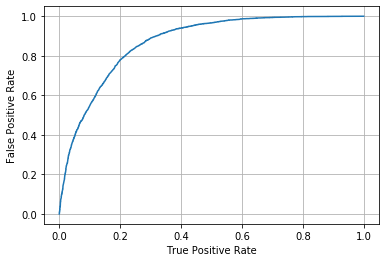

In [103]:

plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')

plt.plot( fpr, tpr )
plt.grid()

In [104]:
# площадь под ROC-кривой 
from sklearn.metrics import roc_auc_score

In [105]:
roc_auc_score(y_test, predictions[:, 1])

0.86989902250642